#**Proyecto Datacademy: Pokemon**



Este proyecto fue desarrollado como un ejercicio académico entre algunos participantes del Datacademy de Platzi, con el fin de abordar y poner en práctica los conocimientos adquiridos en diferentes cursos de la escuela de Ciencia de Datos. 

Se realizó un análisis exploratorio de datos, se planteó una hipótesis a evaluar y se realizó una primera aproximación a un modelo de Machine Learning con regresión lineal. 


***Authors:*** *Andres, Ivan Carrillo, Vannessa Martinez*

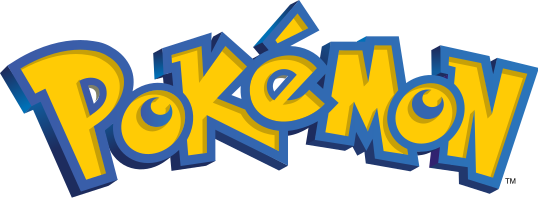

*Fuente de la data: [Kaggle, The Complete Pokemon Dataset](https://www.kaggle.com/terminus7/pokemon-challenge)*

## Sobre los Datos

### ¿Qué contienen los datos?

- Un Dataset con datos de 800 Pokemones diferentes, entre los que están sus características, tipo y poderes.

- Un segundo Dataset con datos de simulaciones de combates entre Pokemones. Se simularon 50,000 combates y cada Pokémon tiene más o menos 2,500 combates en la simulación.

### ¿Cuál es la hipótesis a evaluar?

- ¿Cuáles son las características de un Pokémon que más influyen en que gane o no? *La hipótesis original es que, entre mayor sea la cantidad de puntos de salud y defensa de un Pokemon, más posibilidades tendrá este Pokemon de ganar un combate.*

Entre algunas preguntas relevantes a responder para validar la hipótesis encontramos:

1. ¿Cuál es la cantidad de Pokemones de cada tipo en el Dataset?
2. ¿Cuántos Pokemones son legendarios y cuáles no?
3. ¿Cuáles son los Pokemones con el mayor porcentaje de victorias?
4. ¿Cuáles son los Pokemones con el menor porcentaje de victorias?
6. ¿Todos los Pokemones tienen un Ataque y Defensa especial?
7. ¿Cómo se correlacionan las distintas variables?

In [ ]:
#@title
# Importar liberías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Rutas de los datasets
url_pokemon_data = 'https://git.io/JWzrH'
url_combats_data = 'https://git.io/JCSUs'

# Importar datos
df_1 = pd.read_csv(url_pokemon_data)  # Caracteristicas de Pokemones
df_2 = pd.read_csv(url_combats_data)  # Datos de combates

# Crear copias de los dataframes para trabajar con ellas
df_pokemon = df_1.copy(deep=True)
df_combats = df_2.copy(deep=True)

## ¿Cómo se distribuyen los Pokemones de acuerdo a su tipo principal?

Text(0, 0.5, 'Cantidad de Pokemones')

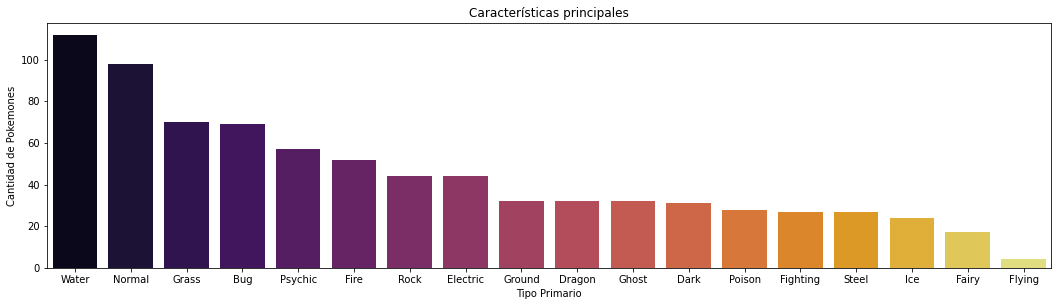

In [ ]:
#@title
plt.figure(figsize=(18, 4.5))
sns.countplot(data=df_pokemon, x='Type 1', palette='inferno',
              order=['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Rock',
                     'Electric', 'Ground', 'Dragon', 'Ghost', 'Dark', 'Poison', 'Fighting',
                     'Steel', 'Ice', 'Fairy', 'Flying'])
sns.set_palette("inferno")

plt.title('Características principales')
plt.xlabel('Tipo Primario')
plt.ylabel('Cantidad de Pokemones')

In [ ]:
#@title
df_pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

Los Pokemones más comunes son:

*   Tipo ***Water*** (Agua)
*   Tipo ***Normal*** (Normales)


Los Pokemones menos comunes son:

*   Tipo ***Flying*** (voladores)
*   Tipo ***Fairy*** (Hada)




## ¿Cómo se distribuyen los Pokemones de acuerdo a su tipo secundario?

Text(0, 0.5, 'Cantidad de Pokemones')

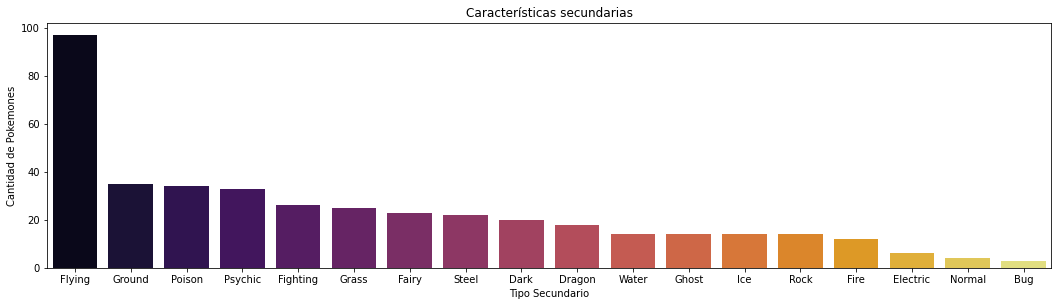

In [ ]:
#@title
plt.figure(figsize=(18, 4.5))

sns.countplot(data=df_pokemon, x='Type 2', palette='inferno',
              order=['Flying', 'Ground', 'Poison', 'Psychic', 'Fighting',
                     'Grass', 'Fairy','Steel', 'Dark', 'Dragon', 'Water',
                     'Ghost', 'Ice', 'Rock', 'Fire','Electric', 'Normal', 'Bug'])

sns.set_palette("inferno")

plt.title('Características secundarias')
plt.xlabel('Tipo Secundario')
plt.ylabel('Cantidad de Pokemones')

In [ ]:
#@title
df_pokemon['Type 2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

Los pokemones más comunes por tipo secundario son:

*   Tipo ***Flying*** (Voladores)
*   Tipo ***Ground*** (Tierra)


Los pokemones menos comunes son:

*   Tipo ***Normal*** (Normales)
*   Tipo ***Bug*** (Insecto)

## Proporcion entre Pokemones legendarios vs no legendarios

De los 800 Pokemones, 65 (8.12%) son legendarios y 735 (91.87%) no lo son

Text(0.5, 1.0, 'Gráfica de Pie de Pokemones Legendarios')

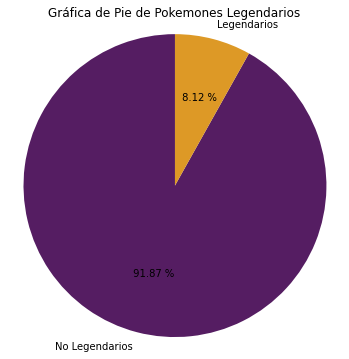

In [ ]:
#@title
labels = 'No Legendarios', 'Legendarios'
sections = df_pokemon['Legendary'].value_counts()
colors = ['#551D62', '#DD9926']

sns.set_palette("inferno")
plt.figure(figsize=(6, 6))
plt.pie(sections, labels=labels, colors=colors,
        startangle=90, autopct='% 1.2f %%',  )

plt.axis('equal') 
plt.title('Gráfica de Pie de Pokemones Legendarios')

## Factores que inciden en la victoria de un Pokémon

## Porcentaje de Victorias de cada Pokemon

In [ ]:
#@title
# Total de victorias
total_Wins = df_combats['Winner'].value_counts()
# Obtener el # de victorias de cada Pokemon
numberOfWins = df_combats.groupby('Winner').count()

# Contar la cantidad de victorias
countByFirst = df_combats.groupby('Second_pokemon').count()
countBySecond = df_combats.groupby('First_pokemon').count()

# Ordenar resultados
numberOfWins = numberOfWins.sort_index()

# Obtener porcentaje de vitorias
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['Win Percentage'] = numberOfWins.First_pokemon / numberOfWins['Total Fights']

# Agregar los resultados al dataset de Pokemones
results2 = pd.merge(df_pokemon, numberOfWins, right_index = True, left_on='#')
results3 = pd.merge(df_pokemon, numberOfWins, left_on='#', right_index = True, how='left')

Estos son los 10 pokemones con el mayor porcentaje de victorias:

In [ ]:
#@title
df_report = results3.copy()
df_report['Win Percentage'] = df_report['Win Percentage'].apply(lambda x: round(x * 100, 2))

df_report[np.isfinite(results3['Win Percentage'])].sort_values(
    by = ['Win Percentage'], ascending = False).head(10).loc[:, 
                                                             ['Name', 
                                                              'Attack', 
                                                              'Sp. Atk', 
                                                              'Speed', 
                                                              'Total Fights', 
                                                              'Win Percentage']]                                                              

,Name,Attack,Sp. Atk,Speed,Total Fights,Win Percentage
154,Mega Aerodactyl,135,70,150,129.0,98.45
512,Weavile,120,45,125,119.0,97.48
703,Tornadus Therian Forme,100,110,121,125.0,96.80
19,Mega Beedrill,150,15,145,119.0,96.64
153,Aerodactyl,105,60,130,141.0,96.45
476,Mega Lopunny,136,54,135,129.0,96.12
726,Greninja,95,103,122,127.0,96.06
716,Meloetta Pirouette Forme,128,77,128,123.0,95.93
164,Mega Mewtwo Y,150,194,140,125.0,95.20
349,Mega Sharpedo,140,110,105,120.0,95.00


Estos son los 10 Pokemones con el peor porcentaje de Victorias:

In [ ]:
#@title
df_report[np.isfinite(results3['Win Percentage'])].sort_values(
    by = ['Win Percentage']).head(10).loc[:, 
                                                             ['Name', 
                                                              'Attack', 
                                                              'Sp. Atk', 
                                                              'Speed', 
                                                              'Total Fights', 
                                                              'Win Percentage']]

,Name,Attack,Sp. Atk,Speed,Total Fights,Win Percentage
289,Silcoon,35,25,15,138.0,2.17
189,Togepi,20,40,20,122.0,2.46
638,Solosis,30,105,20,129.0,3.10
236,Slugma,40,70,20,123.0,3.25
576,Munna,25,67,24,128.0,3.91
188,Igglybuff,30,40,15,115.0,4.35
394,Wynaut,23,23,23,130.0,4.62
209,Wooper,45,25,15,125.0,4.80
291,Cascoon,35,25,15,133.0,5.26
752,Spritzee,52,63,23,133.0,6.02


### Los puntos de Salud y Defensa ¿Influyen de manera positiva en el porcentaje de victorias de cada Pokémon?

Relación entre los Puntos de Salud y el Porcentaje de victorias

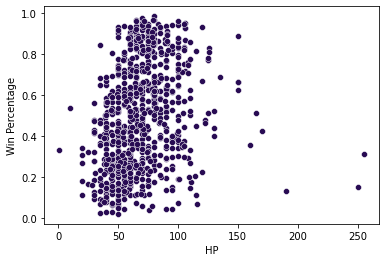

In [ ]:
#@title
sns.scatterplot(data=results3, x='HP', y='Win Percentage')

Relación entre la Defensa y el Porcentaje de victorias

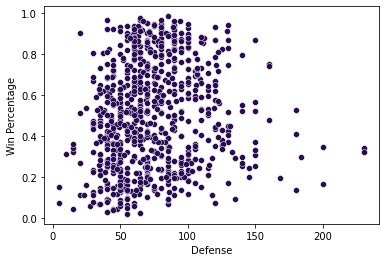

In [ ]:
#@title
sns.scatterplot(data=results3, x='Defense', y='Win Percentage')

Matriz de Correlacion entre Puntos de salud, Defensa y procentaje de victorias:

In [ ]:
#@title
results3.loc[:,col].corr()

,HP,Defense,Win Percentage
HP,1.000000,0.239622,0.258006
Defense,0.239622,1.000000,0.129426
Win Percentage,0.258006,0.129426,1.000000


**Conclusiones:** no existe uan correlacion entre los puntos de salud **"HP"** y Defensa **"Defense"**. Por lo tanto encontramos que nuestra **hipotesis original** era **incorrecta**.

Entonces, cuales son los factores que influyen en que un pokemon sea un ganador?

Las variables que más estan correlacionadas con el porcentaje de victorias son: velocidad, Ataque y Ataque especial:

*   Speed = 0.937742
*   Attack = 0.500181
*   Sp. Atk = 0.478940


Los datos muestran que lo que más importante para ganar es hacer **ataques poderosos** y **rápidos**.


Correlación entre la velocidad y el porcentaje de victorias

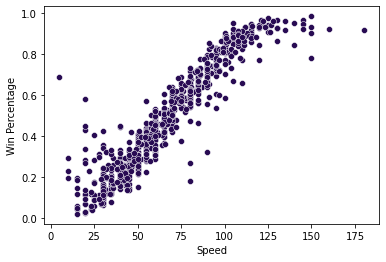

In [ ]:
#@title
sns.scatterplot(data=results3, x='Speed', y='Win Percentage')

Correlación entre el Ataque y el porcentaje de victorias

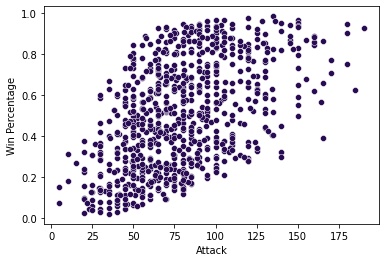

In [ ]:
#@title
sns.scatterplot(data=results3, x='Attack', y='Win Percentage')

Correlación entre el Ataque Especial y el porcentaje de victorias

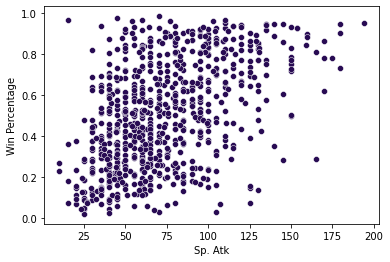

In [ ]:
#@title
sns.scatterplot(data=results3, x='Sp. Atk', y='Win Percentage')

### Matriz de Correlacion entre velocidad, ataque y ataque especial con el procentaje de victorias:

In [ ]:
#@title
col = ['Speed', 'Attack', 'Sp. Atk', 'Win Percentage']
results3.loc[:,col].corr()

,Speed,Attack,Sp. Atk,Win Percentage
Speed,1.000000,0.381240,0.473018,0.937742
Attack,0.381240,1.000000,0.396362,0.500181
Sp. Atk,0.473018,0.396362,1.000000,0.478940
Win Percentage,0.937742,0.500181,0.478940,1.000000


Entonces, ¿Cuál es el "Pokemon ideal"?

De acuerdo a nuestros datos los Pokemones con los puntajes mas altos de Ataque, Velocidad y Ataque Especial son: 

In [ ]:
#@title
# Filtrar por porcentaje de victoria y puntajes de variables fuertemente correlacionadas
df_report[np.isfinite(results3['Win Percentage'])].sort_values(
    by = ['Win Percentage'], ascending=False
).head(10).loc[:, ['Name', 'Attack', 'Sp. Atk', 'Speed','Win Percentage']]

,Name,Attack,Sp. Atk,Speed,Win Percentage
154,Mega Aerodactyl,135,70,150,98.45
512,Weavile,120,45,125,97.48
703,Tornadus Therian Forme,100,110,121,96.80
19,Mega Beedrill,150,15,145,96.64
153,Aerodactyl,105,60,130,96.45
476,Mega Lopunny,136,54,135,96.12
726,Greninja,95,103,122,96.06
716,Meloetta Pirouette Forme,128,77,128,95.93
164,Mega Mewtwo Y,150,194,140,95.20
349,Mega Sharpedo,140,110,105,95.00


# **Machine Learning aplicado: Regresión Lineal**

Se realizo una regresión lineal múltiple para tratar de predecir la probabilidad de victoria de los Pokemones.

El modelo se entrenó con las variables:

$X$: HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

$y$: Total Fights

Del modelo se obtuvo un *score*  de : 0.0225322673795497 (2.25%)

Y a la hora medir el error se usó el *error absoluto medio,* con un resultado de: 8.445332885589343 (8.44%)



Se concluyo que el modelo no aporta mucho al análisis en este caso y que se obtuvo informacion mucho mas valiosa a partir del analisis descriptivo de los datos.